<a href="https://colab.research.google.com/github/AbhiMan1601/FURCA2023---Network-Data-Analytics-in-Ethereum/blob/main/Network_Data_Analytics_in_Ethereum_FURCA_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FESTIVAL OF UNDERGRADUATE RESEARCH AND CREATIVE ACTIVITIES 2023 CONFERENCE**
# *NETWORK DATA ANALYTICS IN ETHEREUM*
*WITH SPECIAL REFERENCE TO THE ETHEREUM IMPROVEMENT PROPOSAL 5133*
> *By Abhimanyu Nag* 











# ABSTRACT
A lot of research has been done on reaping the fruits of Blockchain Technology and Artificial Intelligence. Blockchains have made our lives much easier in terms of intelligent applications like healthcare and they have also solved some very core problems in privacy and decentralization. Ethereum, one of the most widely used blockchains, is a decentralized platform that enables the creation of decentralized apps. Every day millions of developers and investors interact with the Ethereum protocol and unbeknownst to them, every move they make in the system essentially results in the accumulation of data which, though tiresome to acquire, are extremely valuable in terms of assessing the network metrics. Through this research, we analyze the performance of the Ethereum network, identify potential performance degradation issues and investment opportunities, ultimately showing the importance of such endeavor through the example of the Ethereum Improvement Proposal 5133, a proposal submitted by our team at Nethermind to the core developers of the Ethereum protocol, which leveraged the application of statistical analyses on the network and the result of this research was crucial to launch the Merge, which was the biggest event in Ethereum's history and impacted millions worldwide. Another aim of this research is to help make investment decisions by figuring out which factors would prove to be good predictors of Ethereum's stock price and how to quantify crowd behaviour to predict rewards. This work has been cited in the Ethereum yellow paper and has been lauded by various journals for its importance.

# CONTENTS


*   ***Ethereum Network Metrics*** 
*   ***Ethereum Network Data Analysis*** 

*   ***Investment Opportunites and Big Events in Ethereum*** 











# Ethereum Network Metrics - EtherScan

After the London hard fork on Dec 1 2020
The Merge Happened in September 
Assuming knowledge about the following metrics, they were taken from EtherScan

Network Hash Rate 

Network Utilization Chart 

Block Time 

Network Difficulty Rate 

Daily transactions - better metric is TPS i.e transactions/86400

Active Address Count 

target variable : Block Count 

We have a CSV generated of the above metrics till 10th March 2023 from the beginning of genesis block of Ethereum. 




# Ethereum Network Data Analysis


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('FURCA-Data.csv')
data.head()

,Date,Txn_Value,BlockTime,Difficulty,Unique_Address_Total_Count,Utilization,Hash_Rate,Total_Count
0,7/30/2015,8893,4.46,0.121,8894,0.0,11.5297,6912
1,7/31/2015,0,12.58,0.603,0,0.0,51.4594,6863
2,08-01-2015,0,16.34,0.887,0,0.0,57.7845,5293
3,08-02-2015,0,16.12,1.020,0,0.0,67.9224,5358
4,08-03-2015,0,16.37,1.126,0,0.0,74.5737,5280


<AxesSubplot:>

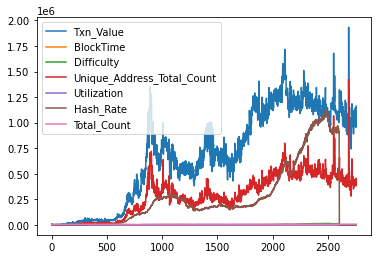

In [4]:
data.plot()

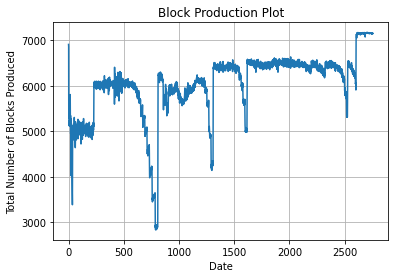

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y = data['Total_Count']

fig, ax = plt.subplots()
ax.plot(y)

ax.set(xlabel='Date', ylabel='Total Number of Blocks Produced',
       title='Block Production Plot')
ax.grid()
plt.show()

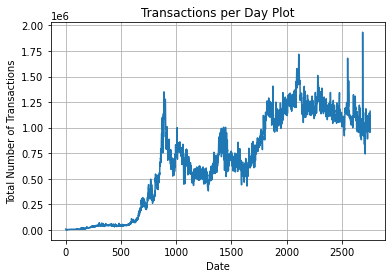

In [6]:
y = data['Txn_Value']

fig, ax = plt.subplots()
ax.plot(y)

ax.set(xlabel='Date', ylabel='Total Number of Transactions',
       title='Transactions per Day Plot')
ax.grid()
plt.show()

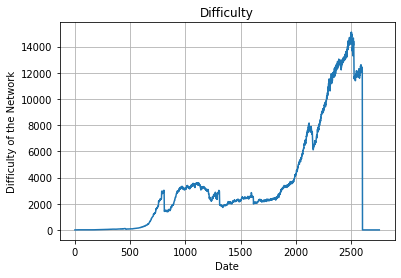

In [7]:
y = data['Difficulty']

fig, ax = plt.subplots()
ax.plot(y)

ax.set(xlabel='Date', ylabel='Difficulty of the Network',
       title='Difficulty')
ax.grid()
plt.show()

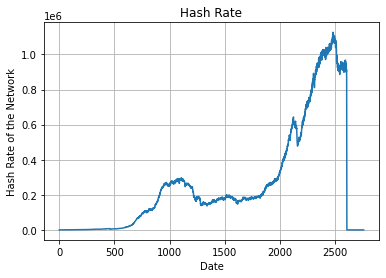

In [8]:
y = data['Hash_Rate']

fig, ax = plt.subplots()
ax.plot(y)

ax.set(xlabel='Date', ylabel='Hash Rate of the Network',
       title='Hash Rate')
ax.grid()
plt.show()

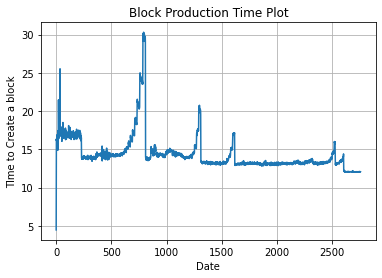

In [10]:
y = data['BlockTime']

fig, ax = plt.subplots()
ax.plot(y)

ax.set(xlabel='Date', ylabel='TIme to Create a block',
       title='Block Production Time Plot')
ax.grid()
plt.show()

In [ ]:
data.corr()

,Txn_Value,BlockTime,Difficulty,Unique_Address_Total_Count,Utilization,Hash_Rate,Total_Count
Txn_Value,1.000000,-0.459676,0.671017,0.977869,0.704281,0.683698,0.563773
BlockTime,-0.459676,1.000000,-0.197350,-0.421284,-0.179490,-0.247266,-0.954629
Difficulty,0.671017,-0.197350,1.000000,0.701821,0.265557,0.997256,0.220412
Unique_Address_Total_Count,0.977869,-0.421284,0.701821,1.000000,0.661423,0.715243,0.512832
Utilization,0.704281,-0.179490,0.265557,0.661423,1.000000,0.268368,0.252005
Hash_Rate,0.683698,-0.247266,0.997256,0.715243,0.268368,1.000000,0.264317
Total_Count,0.563773,-0.954629,0.220412,0.512832,0.252005,0.264317,1.000000


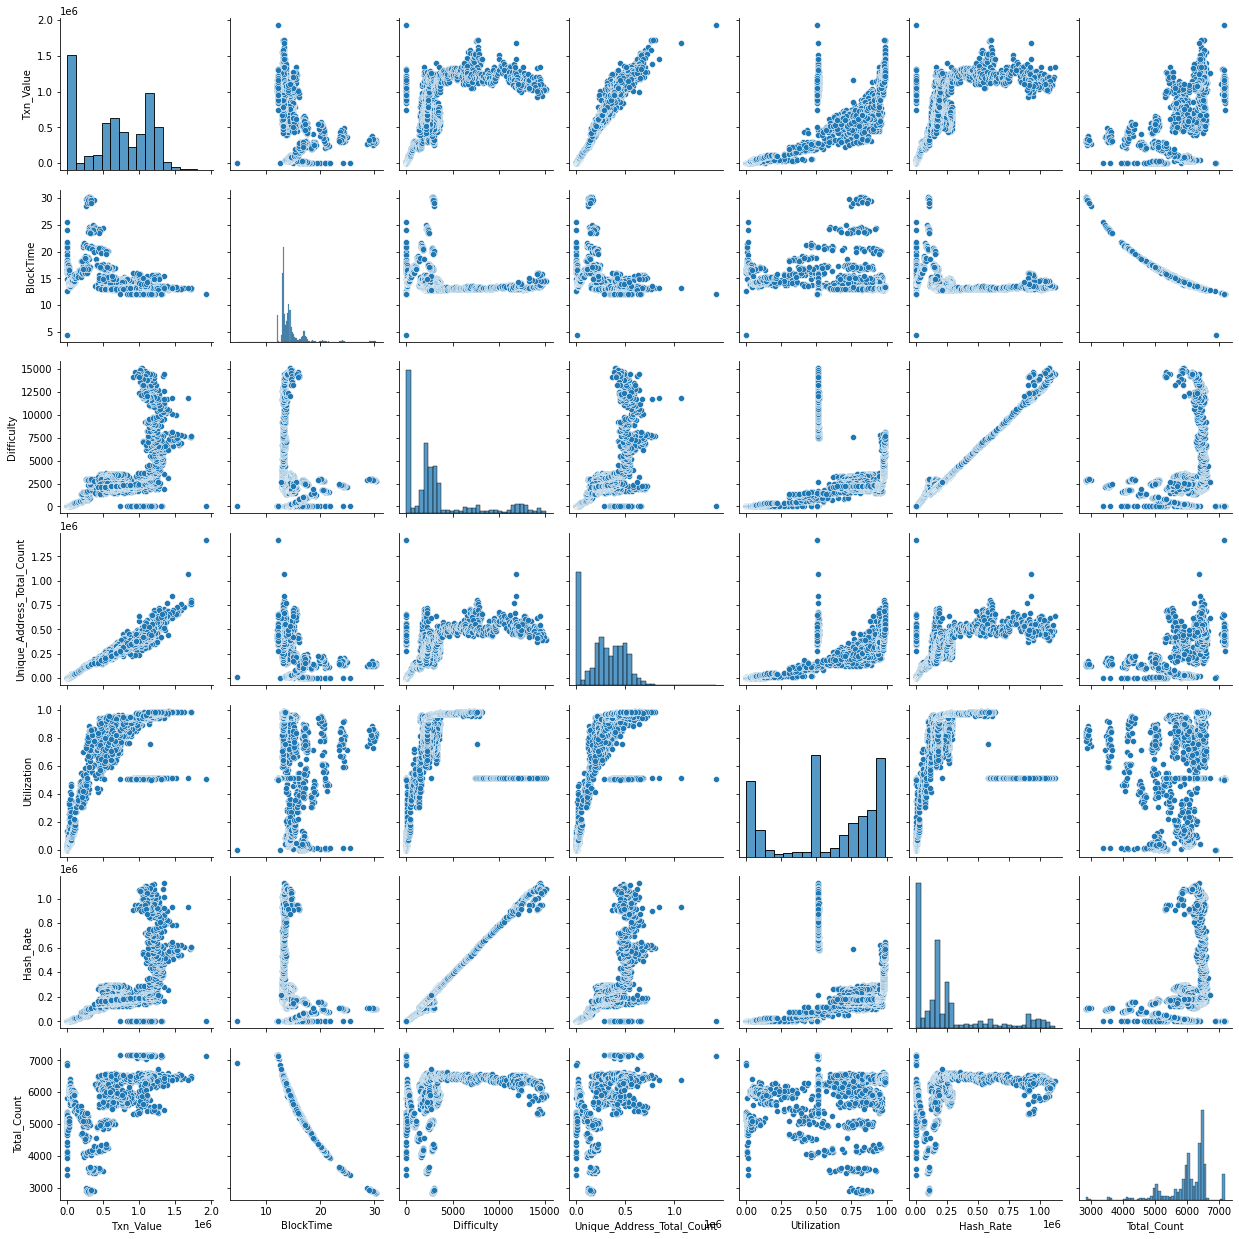

In [ ]:
import seaborn as sns

sns.pairplot(data)

There is heavy correlation between factors in the data. We are going to do model selection specifically use stepwise selection and cross valiation (using a 80/20 split) to figure out the best model for the total block count.

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = data.drop(['Total_Count']).copy()
y = data['Total_Count']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)
# print(X_test.shape), print(y_test.shape)

KeyError: ignored

In [ ]:
# Cross Validation 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
scores = cross_val_score(model, X, y, cv=5)
scores

array([1., 1., 1., 1., 1.])

Which will be obvious since multicorrelinearity among features would lead to a good $R^2$

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
results = smf.ols('Total_Count ~ Txn_Value + BlockTime + Difficulty + Unique_Address_Total_Count + Utilization + Hash_Rate', data=data).fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     8198.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:53:23   Log-Likelihood:                -17955.
No. Observations:                2758   AIC:                         3.592e+04
Df Residuals:                    2751   BIC:                         3.597e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
  
# Perform stepwise regression
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select='auto')
selected_features = sfs.fit(X_train, y_train)
sfs

SequentialFeatureSelector(estimator=LinearRegression(),
                          n_features_to_select='auto')

In [ ]:
sfs.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_features_to_select': 'auto',
 'n_jobs': None,
 'scoring': None,
 'tol': None}

In [ ]:
New_model = sfs.transform(X_train)
New_model

array([[5.599000e+04, 1.419000e+01, 6.070000e+03],
       [2.800540e+05, 1.621000e+01, 5.272000e+03],
       [1.551700e+04, 1.692000e+01, 5.055000e+03],
       ...,
       [6.797330e+05, 1.498000e+01, 5.663000e+03],
       [1.151038e+06, 1.208000e+01, 7.151000e+03],
       [1.205676e+06, 1.323000e+01, 6.438000e+03]])

In [ ]:
Data2 = pd.DataFrame(New_model)
Data2

,0,1,2
0,55990.0,14.19,6070.0
1,280054.0,16.21,5272.0
2,15517.0,16.92,5055.0
3,42809.0,13.96,6001.0
4,1149031.0,12.10,7138.0
...,...,...,...
2201,6123.0,18.02,4738.0
2202,1099261.0,13.55,6287.0
2203,679733.0,14.98,5663.0
2204,1151038.0,12.08,7151.0


In [ ]:
Data2.corr()

,0,1,2
0,1.000000,-0.459598,0.564512
1,-0.459598,1.000000,-0.955404
2,0.564512,-0.955404,1.000000


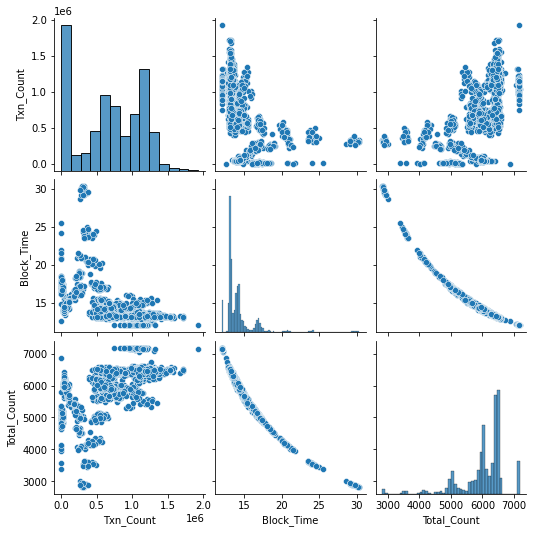

In [ ]:
sns.pairplot(Data2)

In [ ]:
Data2.columns = ['Txn_Count','Block_Time','Total_Count']

In [ ]:
print(Data2)

      Txn_Count  Block_Time  Total_Count
0       55990.0       14.19       6070.0
1      280054.0       16.21       5272.0
2       15517.0       16.92       5055.0
3       42809.0       13.96       6001.0
4     1149031.0       12.10       7138.0
...         ...         ...          ...
2201     6123.0       18.02       4738.0
2202  1099261.0       13.55       6287.0
2203   679733.0       14.98       5663.0
2204  1151038.0       12.08       7151.0
2205  1205676.0       13.23       6438.0

[2206 rows x 3 columns]


In [ ]:
results2 = smf.ols('Total_Count ~ Txn_Count + Block_Time ', data=Data2).fit()

In [ ]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Count   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.527e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:53:44   Log-Likelihood:                -14649.
No. Observations:                2206   AIC:                         2.930e+04
Df Residuals:                    2203   BIC:                         2.932e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9594.4328     30.218    317.505      0.0

<AxesSubplot:>

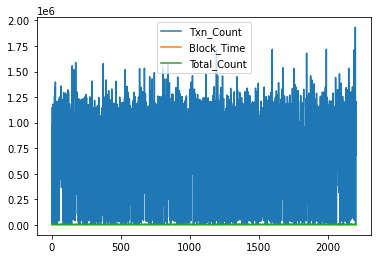

In [ ]:
Data2.plot()

# Model Performance Metrics 
We use Mean Squared Error on the test data as a metric to recognise this model's performance on real world data. 

In [ ]:
y_pred = -259.3213*X_test['BlockTime'] + 0.0002*X_test['Txn_Value'] + 9594.4328

In [ ]:
y_pred

1765    6356.059014
1003    5908.948547
711     4834.176433
1429    6369.632427
2568    6367.162658
           ...     
1170    6120.447221
7       5214.496043
2731    6674.511935
400     5928.339366
1096    6050.646675
Length: 276, dtype: float64

In [ ]:
error = y_test - y_pred

{'whiskers': [<matplotlib.lines.Line2D at 0x7f01e7e124f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01e7e12370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f01e7e12e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f01e7171070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f01e7171a90>],
 'means': []}

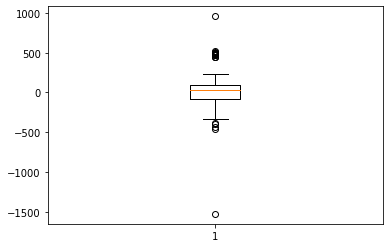

In [ ]:
plt.boxplot(error)

In [ ]:
# Getting rid of outliers since they are caused due to one time events
# IQR
Q1 = np.percentile(error, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(error, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
 
#Below Lower bound
lower=Q1-1.5*IQR


<ipython-input-172-fe3a5ad15f8e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(error, 25,
<ipython-input-172-fe3a5ad15f8e>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(error, 75,


In [ ]:
outliers = []
truth = []

for i in error:
  if i >= upper:
    outliers.append(i)

  if i <= lower:
    outliers.append(i)

  else:
    truth.append(i)

In [ ]:
truth

[77.94098599999961,
 -195.94854699999996,
 -240.17643300000054,
 25.36757299999954,
 7.837341999998898,
 -61.22406200000114,
 56.57622999999967,
 51.7185529999997,
 38.43199899999945,
 124.1334939999997,
 42.95911299999898,
 -29.929237000000285,
 30.074811999999838,
 -293.55199600000105,
 84.3682429999999,
 208.85272599999917,
 40.78398600000037,
 -143.74419100000068,
 110.31528699999944,
 41.56962500000009,
 88.61360599999898,
 178.39568700000018,
 482.14127799999915,
 450.6901169999992,
 -212.64756000000034,
 140.16473899999983,
 50.681837999999516,
 -191.5761760000005,
 119.30895199999941,
 474.37310400000024,
 -29.187058000000434,
 127.71280399999978,
 13.734295999999631,
 -186.6348850000004,
 122.62649899999997,
 -217.58178800000132,
 49.74192099999891,
 465.9577300000001,
 -140.15641400000004,
 -179.25529800000095,
 -323.05446100000063,
 -38.53057700000045,
 476.5329039999997,
 82.76363499999934,
 68.22839899999963,
 57.11648199999945,
 -54.69093700000121,
 442.8321169999999,
 13

In [ ]:
squared_truth = []
for x in truth:
  squared_truth.append(x**2)

print(sum(squared_truth)/len(squared_truth))

33068.8466969621


<AxesSubplot:>

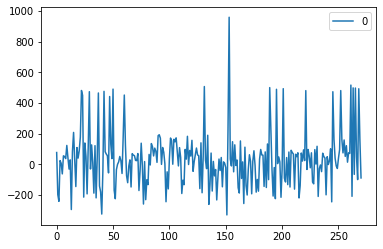

In [ ]:
Truth = pd.DataFrame(truth)
Truth.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f01e393e580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01e393eb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f01e393e400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f01e3932130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f01e3932400>],
 'means': []}

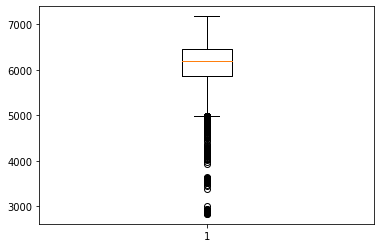

In [ ]:
'''
Try to make a classification prediction instead where you have three variables : System Optimal, Healthy and Unhealthy using logistic regresion
Use boxplots on Block Count to do it 
Less than Q1 : Unhealthy
Between Q1 and Q3 : Healthy 
Above Q3 : Optimal
'''
plt.boxplot(data['Total_Count'])

In [ ]:
# Getting rid of outliers since they are caused due to one time events
# IQR
Q1 = np.percentile(data['Total_Count'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Total_Count'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Above Upper bound
upper1=Q3+1.5*IQR
 
#Below Lower bound
lower1=Q1-1.5*IQR


<ipython-input-188-ba511de5d26d>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Total_Count'], 25,
<ipython-input-188-ba511de5d26d>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['Total_Count'], 75,


In [ ]:
Health = []

for i in data['Total_Count']:
  if i >= upper1:
    Health.append('Optimal')

  if i <= lower1:
    Health.append('Unhealthy')

  else:
    Health.append('Healthy')

In [ ]:
data['Health'] = pd.DataFrame(Health)

In [ ]:
data

,Date,Txn_Value,BlockTime,Difficulty,Unique_Address_Total_Count,Utilization,Hash_Rate,Total_Count,Health
0,7/30/2015,8893,4.46,0.121,8894,0.0000,11.5297,6912,Healthy
1,7/31/2015,0,12.58,0.603,0,0.0000,51.4594,6863,Healthy
2,08-01-2015,0,16.34,0.887,0,0.0000,57.7845,5293,Healthy
3,08-02-2015,0,16.12,1.020,0,0.0000,67.9224,5358,Healthy
4,08-03-2015,0,16.37,1.126,0,0.0000,74.5737,5280,Healthy
...,...,...,...,...,...,...,...,...,...
2753,02-11-2023,961493,12.06,0.000,384209,0.5053,0.0000,7158,Healthy
2754,02-12-2023,953020,12.06,0.000,380397,0.5056,0.0000,7158,Healthy
2755,2/13/2023,1054742,12.06,0.000,424807,0.5045,0.0000,7159,Healthy
2756,2/14/2023,1141796,12.08,0.000,456606,0.5053,0.0000,7148,Healthy


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

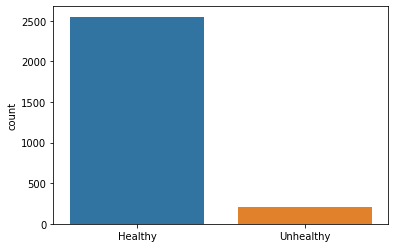

In [ ]:
sns.countplot(Health)

Now we look at everything from a Trading Perspective 

# Ethereum Returns Analysis Pre Merge (Using a Machine Learning Approach, Linear Models) and a Discussion about Returns Post Merge

*The given notebook should not be considered as Financial Advice at all and I do not mean for it to be so.*

**Dataset used :** ETH-USD from yfinance (OHLCV data)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("ETH-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-12,3270.291748,3462.468262,3235.109375,3410.134521,3410.134521,16810411424
1,2021-09-13,3407.471924,3426.502197,3121.514160,3285.511719,3285.511719,22721552948
2,2021-09-14,3286.316406,3429.169678,3273.630859,3429.169678,3429.169678,19125420848
3,2021-09-15,3431.217285,3615.282715,3365.913086,3615.282715,3615.282715,17548551804
4,2021-09-16,3613.073730,3673.310791,3489.805664,3571.294922,3571.294922,20093903064


In [ ]:
data["Returns"] = data["Close"].pct_change()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2021-09-12,3270.291748,3462.468262,3235.109375,3410.134521,3410.134521,16810411424,NaN
1,2021-09-13,3407.471924,3426.502197,3121.514160,3285.511719,3285.511719,22721552948,-0.036545
2,2021-09-14,3286.316406,3429.169678,3273.630859,3429.169678,3429.169678,19125420848,0.043725
3,2021-09-15,3431.217285,3615.282715,3365.913086,3615.282715,3615.282715,17548551804,0.054273
4,2021-09-16,3613.073730,3673.310791,3489.805664,3571.294922,3571.294922,20093903064,-0.012167
...,...,...,...,...,...,...,...,...
361,2022-09-08,1629.805176,1655.064087,1603.063843,1635.347656,1635.347656,17621046717,0.003338
362,2022-09-09,1635.187744,1735.809814,1632.836548,1719.085449,1719.085449,20242323690,0.051205
363,2022-09-10,1718.961304,1784.497803,1710.296997,1776.203735,1776.203735,13130928217,0.033226
364,2022-09-11,1775.976074,1782.729858,1730.164795,1761.800049,1761.800049,12464301922,-0.008109


In [ ]:
!pip install QuantStats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 268 kB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-11-09  2017-11-09
End Period                 2022-09-14  2022-09-14
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      69.0%

Cumulative Return          397.48%     65.88%
CAGR﹪                     39.21%      11.0%

Sharpe                     0.69        0.5
Prob. Sharpe Ratio         96.63%      90.44%
Smart Sharpe               0.67        0.48
Sortino                    1.01        0.68
Smart Sortino              0.97        0.66
Sortino/√2                 0.71        0.48
Smart Sortino/√2           0.68        0.46
Omega                      1.13        1.13

Max Drawdown               -93.96%     -33.72%
Longest DD Days            1115        253
Volatility (ann.)          81.16%      17.48%
R^2                        0.04        0.04
Information Ratio          0.04        0.04
Calmar            

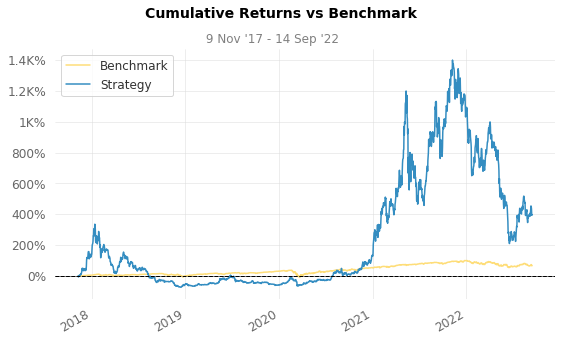

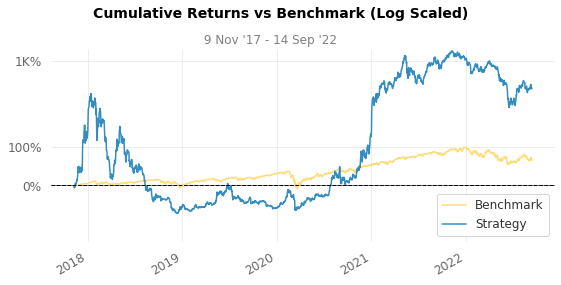

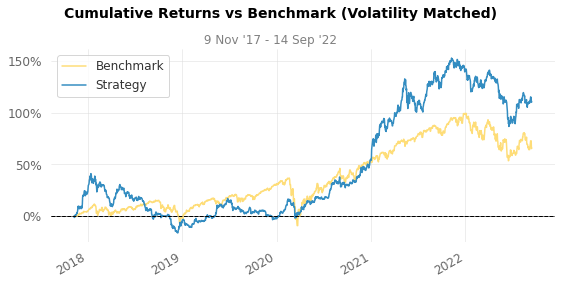

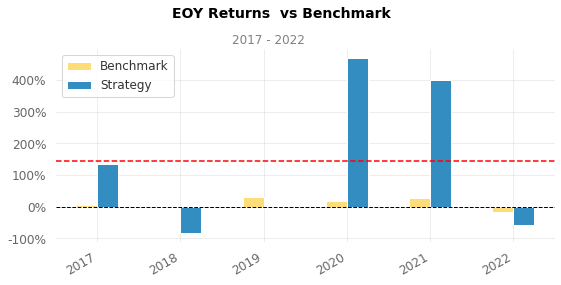

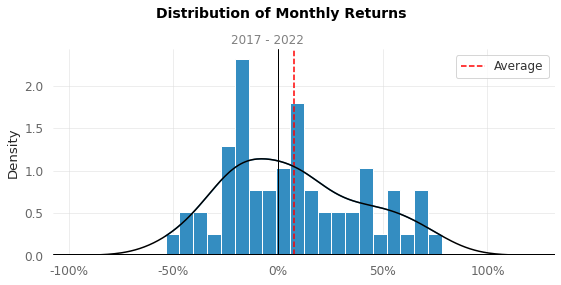

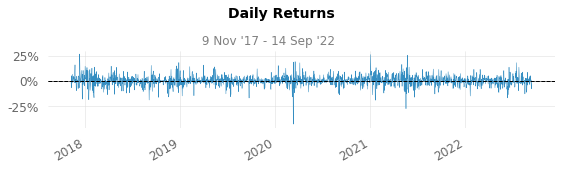

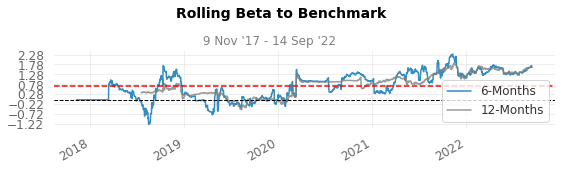

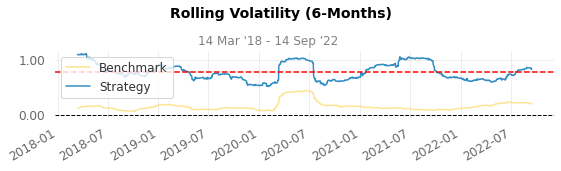

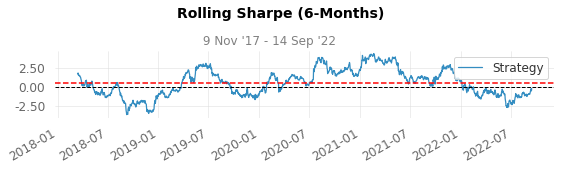

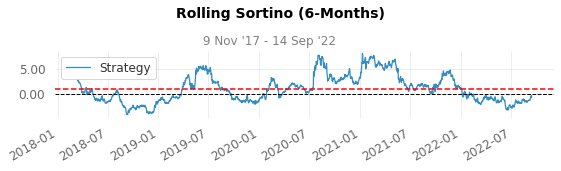

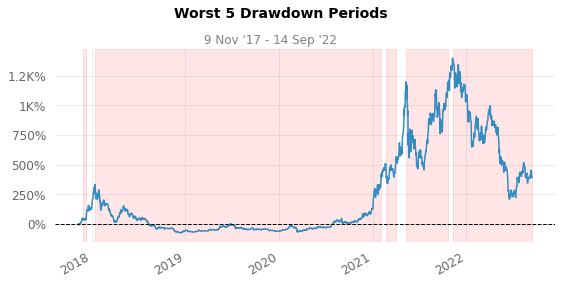

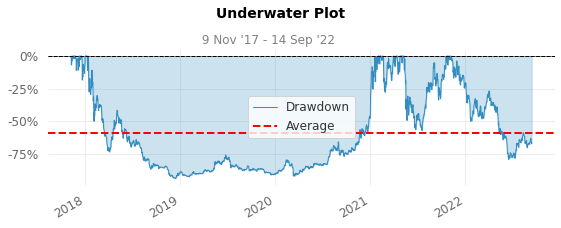

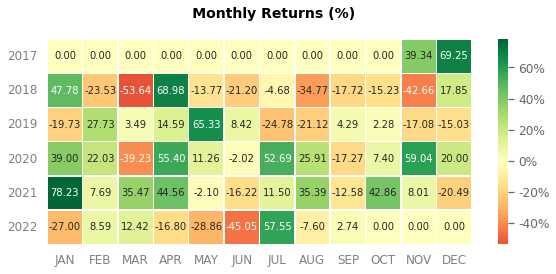

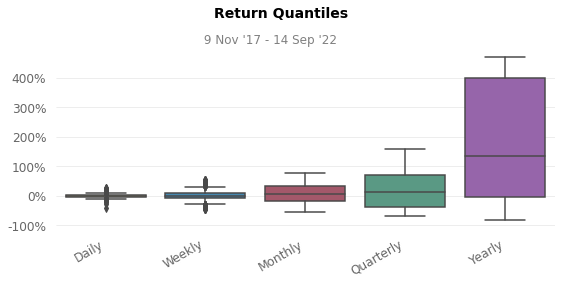

In [ ]:
import quantstats as qs

stock = qs.utils.download_returns('ETH-USD')

qs.reports.full(stock, "SPY")

In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 3.6 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=f38718604703aad05a72b45494de8643f0c3a63efe2a464e7bfe93bbf3b3d861
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta

data.ta.ema(close='close', length=10, append=True)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
361    1595.786933
362    1618.204845
363    1646.931916
364    1667.817031
365    1675.806885
Name: EMA_10, Length: 366, dtype: float64

In [ ]:
data.ta.rsi(close='close', length=10, append=True)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
361    53.667251
362    61.855399
363    66.360992
364    64.235072
365    57.165993
Name: RSI_10, Length: 366, dtype: float64

In [ ]:
data['diff'] = data['Close'].diff()

In [ ]:
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,EMA_10,RSI_10,diff
10,2021-09-22,2763.209229,3089.083008,2741.440674,3077.867920,3077.867920,23742102645,0.113382,3275.552433,40.190859,313.436768
11,2021-09-23,3077.974365,3173.544678,3038.097900,3155.523682,3155.523682,18516291047,0.025230,3253.729023,44.172294,77.655762
12,2021-09-24,3154.562012,3159.644043,2747.337646,2931.669189,2931.669189,25595422789,-0.070941,3195.172690,36.409229,-223.854493
13,2021-09-25,2930.884766,2968.994629,2818.970459,2925.565674,2925.565674,18932786754,-0.002082,3146.153232,36.216405,-6.103515
14,2021-09-26,2926.343018,3114.857422,2744.583008,3062.265381,3062.265381,21172766310,0.046726,3130.900896,43.643786,136.699707
...,...,...,...,...,...,...,...,...,...,...,...
361,2022-09-08,1629.805176,1655.064087,1603.063843,1635.347656,1635.347656,17621046717,0.003338,1595.786933,53.667251,5.441284
362,2022-09-09,1635.187744,1735.809814,1632.836548,1719.085449,1719.085449,20242323690,0.051205,1618.204845,61.855399,83.737793
363,2022-09-10,1718.961304,1784.497803,1710.296997,1776.203735,1776.203735,13130928217,0.033226,1646.931916,66.360992,57.118286
364,2022-09-11,1775.976074,1782.729858,1730.164795,1761.800049,1761.800049,12464301922,-0.008109,1667.817031,64.235072,-14.403686


In [ ]:
# selecting the subset which is affected by the Merge news 
M_data = data.loc[262:365]
M_data

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,EMA_10,RSI_10,diff
262,2022-06-01,1942.050659,1965.166626,1776.053223,1823.569336,1823.569336,21037797760,-0.061142,1896.061965,39.251113,-118.758667
263,2022-06-02,1822.412109,1845.313965,1789.664185,1834.150513,1834.150513,17065041354,0.005802,1884.805338,40.061573,10.581177
264,2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811,-0.032207,1864.855024,36.999642,-59.071900
265,2022-06-04,1775.220825,1810.299683,1751.533325,1801.609497,1801.609497,8677951273,0.014946,1853.355837,39.314276,26.530884
266,2022-06-05,1801.818970,1825.859619,1777.133301,1805.204956,1805.204956,8850385937,0.001996,1844.601132,39.648155,3.595459
...,...,...,...,...,...,...,...,...,...,...,...
361,2022-09-08,1629.805176,1655.064087,1603.063843,1635.347656,1635.347656,17621046717,0.003338,1595.786933,53.667251,5.441284
362,2022-09-09,1635.187744,1735.809814,1632.836548,1719.085449,1719.085449,20242323690,0.051205,1618.204845,61.855399,83.737793
363,2022-09-10,1718.961304,1784.497803,1710.296997,1776.203735,1776.203735,13130928217,0.033226,1646.931916,66.360992,57.118286
364,2022-09-11,1775.976074,1782.729858,1730.164795,1761.800049,1761.800049,12464301922,-0.008109,1667.817031,64.235072,-14.403686


In [ ]:
M_data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,EMA_10,RSI_10,diff
262,2022-06-01,1942.050659,1965.166626,1776.053223,1823.569336,1823.569336,21037797760,-0.061142,1896.061965,39.251113,-118.758667
263,2022-06-02,1822.412109,1845.313965,1789.664185,1834.150513,1834.150513,17065041354,0.005802,1884.805338,40.061573,10.581177
264,2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811,-0.032207,1864.855024,36.999642,-59.071900
265,2022-06-04,1775.220825,1810.299683,1751.533325,1801.609497,1801.609497,8677951273,0.014946,1853.355837,39.314276,26.530884
266,2022-06-05,1801.818970,1825.859619,1777.133301,1805.204956,1805.204956,8850385937,0.001996,1844.601132,39.648155,3.595459
...,...,...,...,...,...,...,...,...,...,...,...
361,2022-09-08,1629.805176,1655.064087,1603.063843,1635.347656,1635.347656,17621046717,0.003338,1595.786933,53.667251,5.441284
362,2022-09-09,1635.187744,1735.809814,1632.836548,1719.085449,1719.085449,20242323690,0.051205,1618.204845,61.855399,83.737793
363,2022-09-10,1718.961304,1784.497803,1710.296997,1776.203735,1776.203735,13130928217,0.033226,1646.931916,66.360992,57.118286
364,2022-09-11,1775.976074,1782.729858,1730.164795,1761.800049,1761.800049,12464301922,-0.008109,1667.817031,64.235072,-14.403686


# Testing for Linear Regression (Statistical Inference)

We now conduct a statistical inference test using Gauss Markov Theorem for the following assumptions for baseline multiple regression model:

- In the population, linearity holds

- The data for the input variables is a random sample from the population.

- No perfect collinearity—there are no exact linear relationships among the input variables.

- The error has a conditional mean of zero given any of the inputs

- Homoskedasticity

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(M_data['Returns'], M_data[['Close','diff','RSI_10','EMA_10']])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                Returns   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              751.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                    1.21e-73
Time:                        20:01:50   Log-Likelihood:                          336.33
No. Observations:                 104   AIC:                                     -664.7
Df Residuals:                     100   BIC:                                     -654.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The things that we need to look at :

- standard error estimates do not account for heteroskedasticity. (almost 0)

- The Durbin Watson Statistic = 2.097 which implies the absense of autocorrelation

- The input variables are not completely correlated to the returns

- The R^2 is 0.98 which suggests a great fit which is absurd but we are also taking into account a look ahead bias (next close considered even when it doesnt make sense to do it)

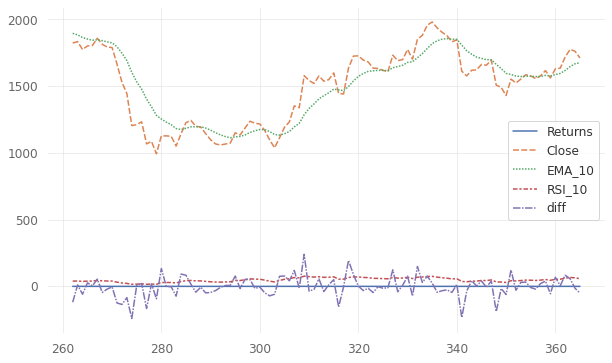

In [ ]:
# plotting the three indicators together
import seaborn as sns

sns.lineplot(data=M_data[['Returns','Close','EMA_10','RSI_10','diff']])

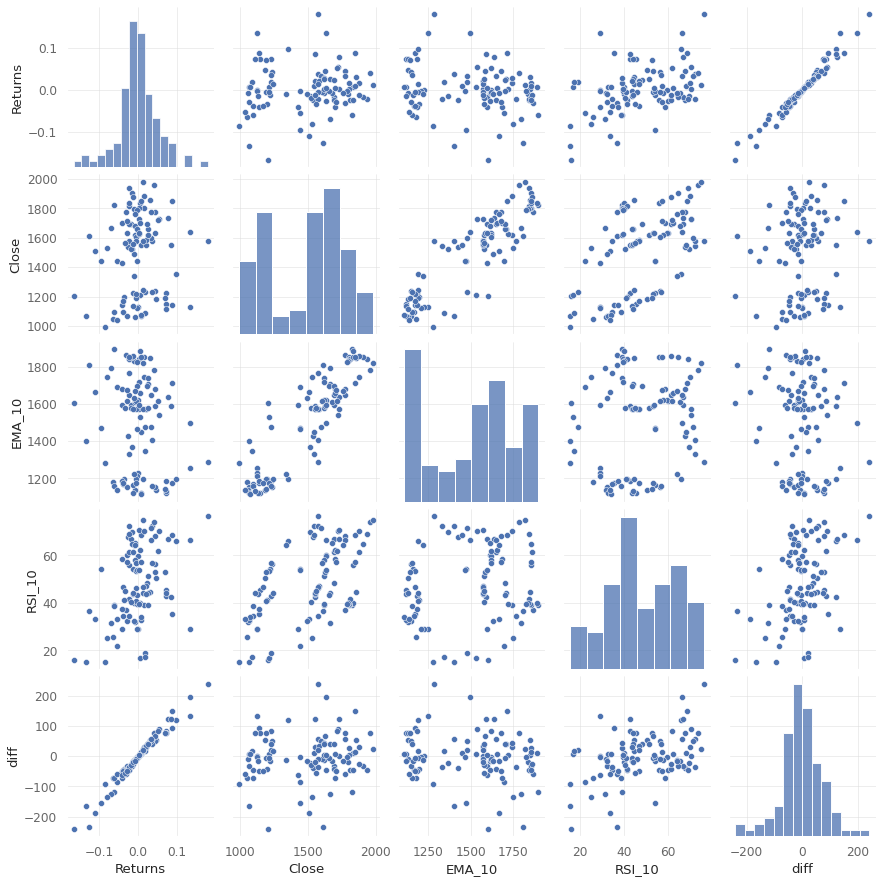

In [ ]:
# checking for 3
sns.pairplot(M_data[['Returns','Close','EMA_10','RSI_10','diff']])

In [ ]:
M_data.corr()

,Open,High,Low,Close,Adj Close,Volume,Returns,EMA_10,RSI_10,diff
Open,1.000000,0.986893,0.982356,0.961597,0.961597,0.072852,-0.171811,0.932930,0.442764,-0.172349
High,0.986893,1.000000,0.983453,0.984440,0.984440,0.107622,-0.040219,0.919333,0.510643,-0.042847
Low,0.982356,0.983453,1.000000,0.983542,0.983542,-0.034928,-0.036456,0.900548,0.528288,-0.029591
Close,0.961597,0.984440,0.983542,1.000000,1.000000,0.034572,0.100658,0.894855,0.566659,0.104623
Adj Close,0.961597,0.984440,0.983542,1.000000,1.000000,0.034572,0.100658,0.894855,0.566659,0.104623
Volume,0.072852,0.107622,-0.034928,0.034572,0.034572,1.000000,-0.111634,0.151089,-0.104849,-0.140554
Returns,-0.171811,-0.040219,-0.036456,0.100658,0.100658,-0.111634,1.000000,-0.166317,0.415143,0.983766
EMA_10,0.932930,0.919333,0.900548,0.894855,0.894855,0.151089,-0.166317,1.000000,0.166617,-0.168788
RSI_10,0.442764,0.510643,0.528288,0.566659,0.566659,-0.104849,0.415143,0.166617,1.000000,0.429051
diff,-0.172349,-0.042847,-0.029591,0.104623,0.104623,-0.140554,0.983766,-0.168788,0.429051,1.000000


# Multiple Linear Regression for In-sample Prediction
We now fit the data as a multiple linear regression to fit the data

In [ ]:
# Split data into testing and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(M_data[['Returns']], M_data[['EMA_10','Close','RSI_10','diff']], test_size=.2)

In [ ]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[-1026.36877456]
 [  217.81907965]
 [  111.80309513]
 [ 1395.19552196]]
Mean Absolute Error: 118.30520361552607
Coefficient of Determination: 0.2861921006999887


The Mean Absolute Error(MAE) can be described as the sum of the absolute error for all observed values divided by the total number of observations.

a lower MAE value is better, and the closer our coefficient of the correlation value is to 1.0 the better.

We recognise the high error of the model here as it is our baseline model and that it could be fit better.

# Shrinkage Methods : Ridge and Lasso Regression
**Ridge regression :** shrinks the regression coefficients by adding a penalty to the objective function that equals the sum of the squared coefficients, which in turn corresponds to the L2 norm of the coefficient vector

Ridge regression shrinks the coefficients relative to the alignment of input variables with the directions in the data that exhibit most variance. More specifically, it shrinks those coefficients the most that represent inputs aligned with the principal components that capture less variance. Hence, the assumption that's implicit in ridge regression is that the directions in the data that vary the most will be most influential or most reliable when predicting the output.

In [ ]:
# Ridge Regression
from sklearn.linear_model import *
from sklearn.metrics import r2_score
rid = Ridge()
a = rid.fit(X_train,y_train)

x_test_pred_rd = rid.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, x_test_pred_rd))
print("Model Coefficients:", a.coef_)
print("R2 score:", r2_score(y_test, x_test_pred_rd))

Mean Absolute Error: 128.56312455132374
Model Coefficients: [[-181.63731832]
 [  38.54762   ]
 [  19.78588484]
 [ 246.90888832]]
R2 score: 0.04547408378140522


**Lasso Regression:**  The lasso (Hastie, Tibshirani, and Wainwright 2015), known as basis pursuit in signal processing, also shrinks the coefficients by adding a penalty to the sum of squares of the residuals, but the lasso penalty has a slightly different effect. The lasso penalty is the sum of the absolute values of the coefficient vector, which corresponds to its L1 norm.

The lasso penalty had the effect of gradually reducing some coefficients to zero as the regularization increases. For this reason, the lasso can be used for the continuous selection of a subset of features.



In [ ]:
# Lasso Regression 
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
a = model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Mean Absolute Error:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Model Coefficients:", a.coef_)
print(r2_score(y_train, pred_train_lasso))

Mean Absolute Error:
182.72389666765525
Model Coefficients: [[-1022.50873569]
 [  213.95904078]
 [  107.94305626]
 [ 1391.33548309]]
0.28469651505584376


# POST MERGE DISCUSSION 
Talk about the future prices, any outliers to be expected, algo trading model

We start by looking at the trading volumes over timeto actually gauge market behaviour and basically quantify the "hype"

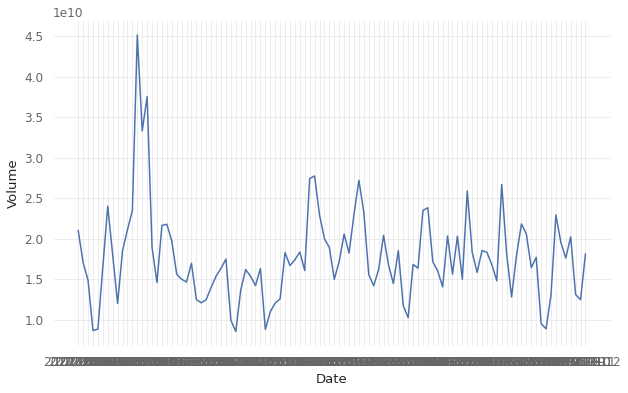

In [ ]:
sns.lineplot(y = "Volume", x= "Date",  data = M_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


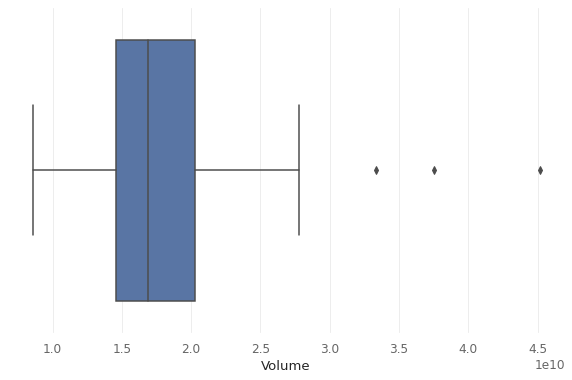

In [ ]:
sns.boxplot(M_data["Volume"])

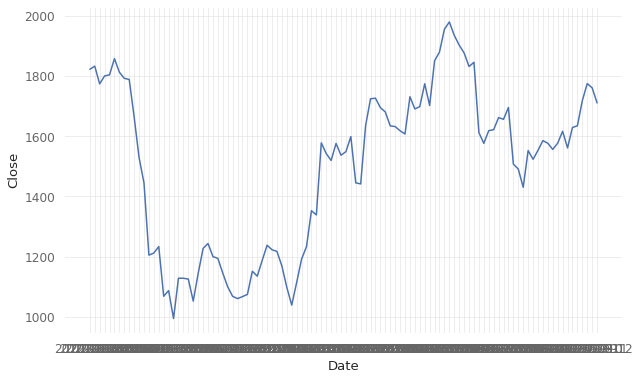

In [ ]:
sns.lineplot(y = "Close", x= "Date",  data = M_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


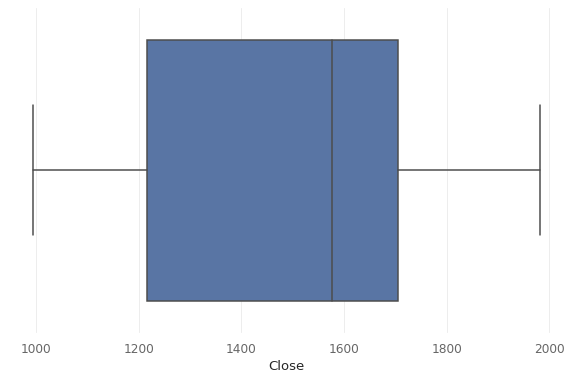

In [ ]:
sns.boxplot(M_data["Close"])

In [ ]:
M_data.loc[M_data['Volume'] >= 30000000000]

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,EMA_10,RSI_10,diff
274,2022-06-13,1443.835449,1448.738037,1181.948242,1204.582764,1204.582764,45162788786,-0.166504,1603.732869,15.921065,-240.633789
275,2022-06-14,1204.555298,1252.471802,1094.701904,1211.662842,1211.662842,33327826525,0.005878,1532.447409,16.680541,7.080078
276,2022-06-15,1211.365967,1236.627563,1025.684204,1233.206421,1233.206421,37539999450,0.017780,1478.039957,19.149681,21.543579


https://www.cryptopolitan.com/why-is-ethereum-crashing/ 

This basically explains the outlier trading volumes due to the crypto crash. 

**What about the Merge? Why is there no outlier difference?** 

**Claim : Either most "investors" don't know/care/understand the Merge or the data does not reflect investor behaviour yet or bigger picture : Investors are waiting to sell once the Merge actually happens because of rising inflation - Article**

Investors are using Bitcoin to hedge against risk as leading traders put it

**Another Claim : One of two things could happen**

**Since more people are buying ETH right now before the Merge, This could be a sell the news thing where people are waiting to "sell the bull",**

**Or people are going to "Ride the Bull" and then buy ETH right after the Merge due to reasons of their own - Environmentalists would invest because ETH is now environment friendly etc : Discussion**

Another thing to see here is that although there have been outlier trading volumes in the past two months, there haven't been outlier close prices, which would lead me to believe that even if there is price shifting, it should not lead to outlier prices.


So for anyone looking to trade the merge, I would basically suggest using the regression line as a signal and whenever the price goes less than 1 std of the predicted average price, the signal should be to buy and if it goes above 0.5-1 std of the predicted price then the signal should be to sell 

# Trading Model for the Merge : A Simple Quant Perspective

In [ ]:
# Trading model for the Merge
# Lasso Regression way (Higher R^2, Less Error)
# Risky

# Inputs
EMA_10 = input(("10 Day Exponential Moving Average: "))
Close = input(("Close Price of Yesterday: "))
RSI_10 = input(("Relative Strength Index 10 day Average: "))
diff = input(("Difference between today's assumed and yesterday's close price: "))

returns = -1016.84961287*float(EMA_10) + 326.48168414*float(Close) + 119.52780236*float(RSI_10) + 1395.21206361*float(diff)

if returns > 0:
  print("Sell")

elif returns < 0:
  print("Buy or Hold")

elif returns == 0:
  print("Hold")


10 Day Exponential Moving Average: 10
Close Price of Yesterday: 50
Relative Strength Index 10 day Average: 88
Difference between today's assumed and yesterday's close price: 90
Sell


In [ ]:
M_data.mean() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Open         1.502286e+03
High         1.549472e+03
Low          1.448916e+03
Close        1.500114e+03
Adj Close    1.500114e+03
Volume       1.769582e+10
Returns      1.997868e-04
EMA_10       1.510342e+03
RSI_10       4.812989e+01
diff        -2.216988e+00
dtype: float64

In [ ]:
M_data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Open         2.766255e+02
High         2.777349e+02
Low          2.784191e+02
Close        2.740251e+02
Adj Close    2.740251e+02
Volume       5.695497e+09
Returns      5.339202e-02
EMA_10       2.502178e+02
RSI_10       1.578467e+01
diff         7.642555e+01
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(M_data[['Close']], M_data[['EMA_10','RSI_10','diff']], test_size=.2)

In [ ]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.80646122]
 [0.03391612]
 [0.03983146]]
Mean Absolute Error: 48.50699979154805
Coefficient of Determination: 0.29120885440415895


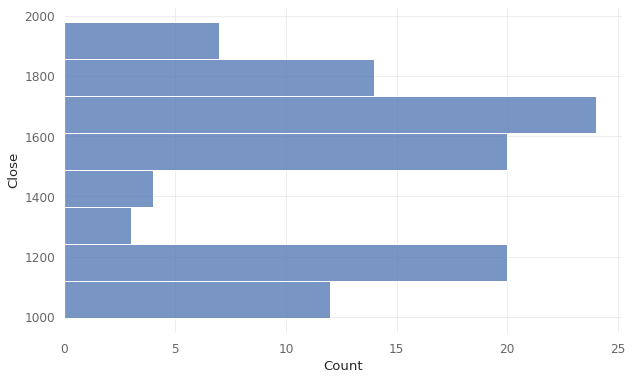

In [ ]:
sns.histplot(y = "Close", data = M_data)

In [ ]:
# Trading Model for the more risk averse for the Merge
# Linear Regression way 
# Risky

# Inputs
EMA_10 = input(("10 Day Exponential Moving Average: "))
RSI_10 = input(("Relative Strength Index 10 day Average: "))
diff = input(("Difference between today's assumed and yesterday's close price: "))

Close = 0.80646122*float(EMA_10) + 0.03391612*float(RSI_10) + 0.03983146*float(diff)

if Close > M_data["Close"].mean()+M_data["Close"].std():
  print("Sell")

elif Close < M_data["Close"].mean()-M_data["Close"].std():
  print("Buy or Hold")

else:
  print("Hold")



10 Day Exponential Moving Average: 1603.732869	
Relative Strength Index 10 day Average: 15.921065
Difference between today's assumed and yesterday's close price: -240.633789
Hold
